In [2]:
import sys
sys.path.append("../")

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, WhiteKernel, Matern
from core import *

In [4]:
plt.rcParams.update({'font.size': 16})
%load_ext autoreload
%autoreload 2

In [5]:
# import the data
def address(t, n_dim, kernel_type, tau_n, l_n, input_type):
    return  ('results/'
             + str(t)[0] + str(t)[2] + '/'
             + str(n_dim) + 'd_' 
             + kernel_type + '_' 
             + str(tau_n) + ''.join([str(l).replace('.','') for l in l_n]) + '_'
             + str(input_type))

In [16]:
res_list = []
for t in (0.6, 0.8, 0.9, 1.0, 1.1, 1.2, 1.4):
    temp = np.load(address(t, 2, 'RBF', 4, (1, 1), 'Gaussian') + '.npy', allow_pickle=True)
    res_list.append(temp)

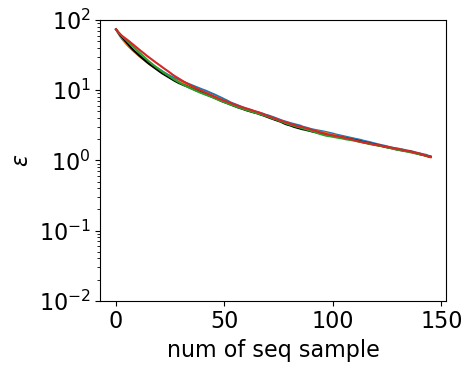

In [7]:
# plot influence of t
plt.figure(figsize=(5,4))
x = np.arange(len(res_list[0][0][0][0][1]))
num_func = len(res_list[0])
index_list = (0, 1, 3, 5, 6)
for i in index_list:
    res_temp = [np.mean([res_list[i][func][init][0][1] for init in range(20)], axis=0) for func in range(num_func)]
    if i == 3:
        plt.plot(x, np.mean(res_temp, axis=0), color='k')
    else:
        plt.plot(x, np.mean(res_temp, axis=0))

plt.xlabel('num of seq sample')
plt.ylim([1e-2, 1e2])
plt.yscale('log')
plt.ylabel('$\epsilon$')

plt.tight_layout()
plt.savefig('plots/t_RBF_2d.pdf')
plt.show()

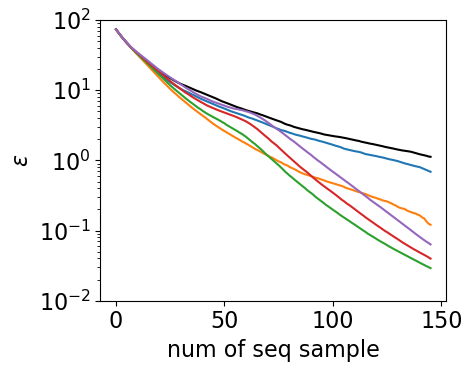

In [8]:
# plot influence of alpha
plt.figure(figsize=(5,4))
x = np.arange(len(res_list[0][0][0][0][1]))
num_func = len(res_list[0])

for i in range(6):
    res_temp = [np.mean([res_list[3][func][init][i][1] for init in range(20)], axis=0) for func in range(num_func)]
    if i == 0:
        plt.plot(x, np.mean(res_temp, axis=0), color='k')
    else:
        plt.plot(x, np.mean(res_temp, axis=0))

plt.xlabel('num of seq sample')
plt.ylabel('$\epsilon$')
plt.yscale('log')

plt.ylim([1e-2, 1e2])

plt.tight_layout()
plt.savefig('plots/alpha_RBF_2d.pdf')
plt.show()

# Contour Plot for the res

In [17]:
x_plot = [0.6, 0.8, 0.9, 1, 1.1, 1.2, 1.4]
y_plot = [0, 1, 2, 3, 4, 6]
x_mesh_plot, y_mesh_plot = np.meshgrid(x_plot, y_plot)
grids = np.concatenate((x_mesh_plot.reshape(-1, 1), 
                          y_mesh_plot.reshape(-1, 1)), axis=1)

In [22]:
grids_res = []
for a in range(6):
    for t in range(7):
        res_temp = [np.mean([res_list[t][func][init][a][1] for init in range(20)], axis=0) for func in range(200)]
        grids_res.append(np.log10(np.mean(res_temp, axis=0)[-1]))

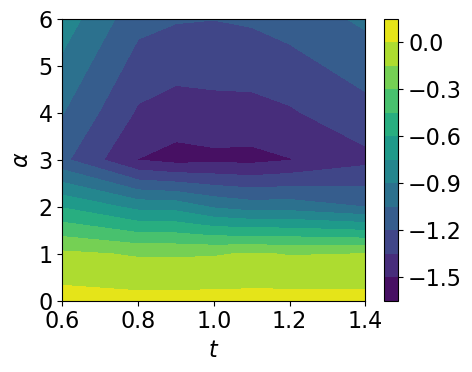

In [23]:
plt.figure(figsize=(5,4))
plt.contourf(x_mesh_plot, y_mesh_plot, 
             np.array(grids_res).reshape(x_mesh_plot.shape), levels=10)
plt.colorbar()
plt.xlabel('$t$')
plt.ylabel('$\\alpha$')
plt.tight_layout()
plt.savefig('plots/ta_RBF_2d.pdf')
plt.show()